# Air transportation Ocurrences
## Summary Analysis 

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append("../scripts")

In [10]:
#Load data
from data_loader import load_data_from_csv, load_data_from_temp
from common.export_csv import exportDataVersion

In [11]:
df = load_data_from_csv('fullData_V2.csv')
#Data length
print(f"# of rows 'fullData_V2.csv': {len(df)}")

# of rows 'fullData_V2.csv': 47791


In [12]:
# Check for missing values in the "Summary" column
missing_count = df['Summary'].isnull().sum()
print(f"Number of missing values in 'Summary': {missing_count}")

# Display rows where "Summary" is missing
if missing_count > 0:
    missing_rows = df[df['Summary'].isnull()]
    print("\nRows with missing 'Summary' values:")
    print(missing_rows)
else:
    print("\nNo missing values in the 'Summary' column.")


Number of missing values in 'Summary': 97

Rows with missing 'Summary' values:
       OccID   Latitude   Longitude CountryID_DisplayEng     OccDate  \
10924  65245  49.183333 -123.166667               CANADA  1990-12-18   
10929  65217  45.666667  -74.033333               CANADA  1990-12-18   
10932  65171  46.150000  -60.033333               CANADA  1990-12-18   
11725  59503  48.483333  -89.333333               CANADA  1988-09-15   
12103  57098  51.116667 -114.116667               CANADA  1986-05-16   
...      ...        ...         ...                  ...         ...   
46691  51925  33.448400 -112.074000        UNITED STATES  1982-05-22   
46693  51922  34.000700  -81.034800        UNITED STATES  1982-02-25   
46694  51921   8.133333  100.916667             THAILAND  1982-04-30   
46801  51300  48.433333  -68.583333               CANADA  1981-05-31   
46878  50862  29.760400  -95.369800        UNITED STATES  1981-04-09   

      OccIncidentTypeID_DisplayEng   OccTime OccTypeID_D

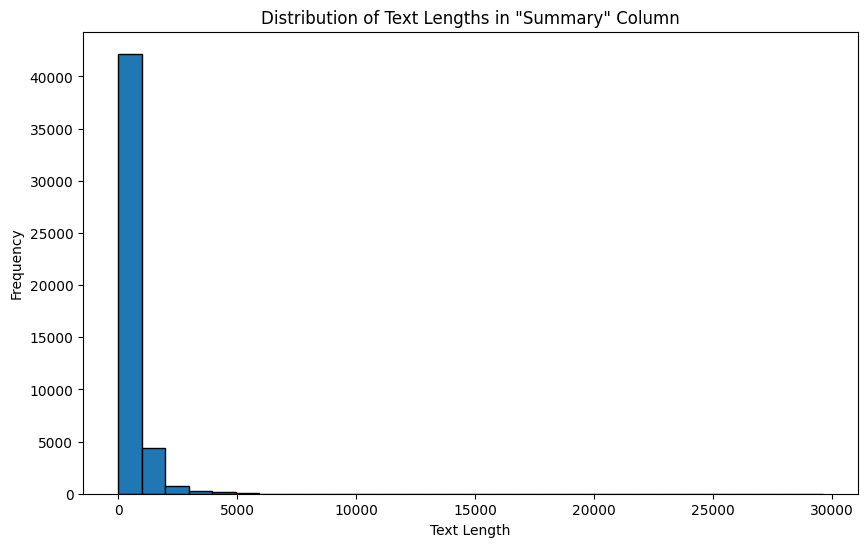

In [13]:
# Calculate the length of each text entry
df['Summary_length'] = df['Summary'].astype(str).apply(len)

# Plot the distribution of text lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Summary_length'], bins=30, edgecolor='k')
plt.title('Distribution of Text Lengths in "Summary" Column')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


In [14]:
# Filter rows where text length is 5000 or more
long_texts = df[df['Summary_length'] >= 5000]

# Display the rows with long text
print(f"Number of entries with text length >= 5000: {len(long_texts)}")
print(long_texts[['Summary', 'Summary_length']])


Number of entries with text length >= 5000: 134
                                                 Summary  Summary_length
2677   A11W0080: At 1920 Mountain Day Time (MDT)  in ...            8219
4781   A13P0154: (from Coroner's Letter)OverviewThe p...            8367
5038   A12W0090: The TSB Edmonton office deployed two...           16957
5042   A12P0097: During departure from Vernon airport...            6872
5157   A12P0008:  At 1351 Pacific Standard Time Air F...            7151
...                                                  ...             ...
42877  A97O0166:  THE CESSNA 150 DEPARTED FROM A PRIV...            5121
42958  A97P0153:  At about 1454 Pacific daylight time...           19864
43285  A96P0064:  The pilot departed the operator's R...           20668
43480  A95P0138:  The Air Canada DC-9-32 (ACA216) wit...           19617
44687  UNE INDICATION DE TRAIN AVANT NON VERROUILLE A...            6338

[134 rows x 2 columns]


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert raw text to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features for visualization
summary_tfidf = tfidf_vectorizer.fit_transform(df['Summary'].dropna().astype(str))
print(f"TF-IDF Matrix Shape: {summary_tfidf.shape}")  # Check the shape of the resulting matrix


TF-IDF Matrix Shape: (47694, 500)


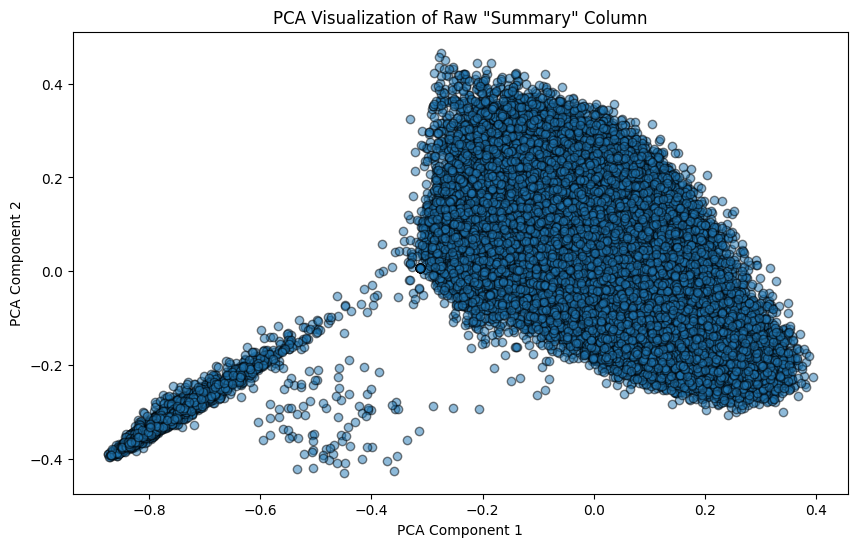

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
summary_pca = pca.fit_transform(summary_tfidf.toarray())

# Plot the reduced vectors
plt.figure(figsize=(10, 6))
plt.scatter(summary_pca[:, 0], summary_pca[:, 1], alpha=0.5, edgecolor='k')
plt.title('PCA Visualization of Raw "Summary" Column')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [17]:
# Step 3: Preprocessing the "Summary" Column
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure NLTK packages are downloaded
nltk.download('punkt')       # Tokenizer
nltk.download('stopwords')   # Stop words list
nltk.download('wordnet')  

nltk.download('omw-1.4')     # WordNet Data
nltk.download('averaged_perceptron_tagger')  # Needed for advanced tokenization
nltk.download('punkt_tab')  # WordNet for lemmatization

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the "Summary" column
df['Summary_cleaned'] = df['Summary'].apply(preprocess_text)

# Display original and cleaned text
print("Sample of original and cleaned text:")
print(df[['Summary', 'Summary_cleaned']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


AttributeError: 'float' object has no attribute 'lower'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 4: Convert cleaned text into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features
summary_tfidf = tfidf_vectorizer.fit_transform(df['Summary_cleaned'])

# Check the shape of the resulting TF-IDF matrix
print(f"TF-IDF Matrix Shape: {summary_tfidf.shape}")

# Display the first few feature names (words)
print("Sample TF-IDF Features (Words):")
print(tfidf_vectorizer.get_feature_names_out()[:10])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get word importance from the TF-IDF matrix
tfidf_features = tfidf_vectorizer.get_feature_names_out()
tfidf_sums = np.array(summary_tfidf.sum(axis=0)).flatten()

# Sort and select the top 20 words
top_indices = np.argsort(tfidf_sums)[-20:]
top_words = tfidf_features[top_indices]
top_scores = tfidf_sums[top_indices]

# Plot the top 20 words
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_scores, edgecolor='k')
plt.title('Top 20 Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Determine the optimal number of clusters using inertia
inertia = []
K = range(1, 10)  # Test 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(summary_tfidf)
    inertia.append(kmeans.inertia_)

# Step 2: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Step 1: Apply K-Means with 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(summary_tfidf)

# Step 2: Assign meaningful names to clusters
# You need to inspect the clusters first to determine appropriate labels
cluster_labels = {0: 'Crash', 1: 'No Crash', 2: 'Incident', 3: 'Other'}
df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

# Step 3: Display the first few rows with cluster labels
print("Cluster assignments with labels for the first few rows:")
print(df[['Summary', 'Summary_cleaned', 'Cluster', 'Cluster_Label']].head())


In [ ]:
# Display sample summaries from each cluster
for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id}:")
    print(df[df['Cluster'] == cluster_id]['Summary'].head(5))


In [ ]:
# Step 6.1: Count the number of summaries in each cluster
cluster_counts = df['Cluster_Label'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

# Plot the distribution of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title('Distribution of Summaries Across Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Summaries')
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Summary_cleaned' column
all_cluster_text = ' '.join(df['Summary_cleaned'].dropna())

# Generate a word cloud for the entire dataset
wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(all_cluster_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axes
plt.title('Word Cloud for All Clusters Combined', fontsize=16)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(summary_tfidf, df['Cluster'])
print(f"Silhouette Score for K={len(df['Cluster'].unique())}: {silhouette_avg}")


In [ ]:
# Display random sample summaries for each cluster
for label in df['Cluster_Label'].unique():
    print(f"\nSample summaries from Cluster: {label}")
    print(df[df['Cluster_Label'] == label]['Summary'].sample(5, random_state=42))


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
summary_pca = pca.fit_transform(summary_tfidf.toarray())

# Scatter plot with cluster labels
plt.figure(figsize=(10, 6))
for label in df['Cluster_Label'].unique():
    cluster_points = summary_pca[df['Cluster_Label'] == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=label, alpha=0.6)

plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
# Summary of clusters
print("Cluster Summary and Sizes:")
cluster_summary = df.groupby('Cluster_Label')['Summary'].count()
print(cluster_summary)

# Optional: Display a sample from each cluster to summarize its content
for label in df['Cluster_Label'].unique():
    print(f"\nCluster: {label}")
    print("Most representative summaries:")
    print(df[df['Cluster_Label'] == label]['Summary'].head(5))  # Display the first 5 summaries


In [ ]:
# Save the DataFrame with clusters and labels
output_path = 'clustered_summary_results.csv'
df.to_csv(output_path, index=False)
print(f"Clustered results saved to {output_path}")


In [ ]:
exportDataVersion(df, 3)

In [38]:
import os
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Surya\OneDrive\Desktop\DA project\DataAnalysisProject\notebooks


In [40]:
import os
file_path = 'fullData_V3.csv'  # Replace with the full file path if necessary
if os.path.exists(file_path):
    print(f"File {file_path} exists.")
else:
    print(f"File {file_path} not found.")


File fullData_V3.csv not found.
